# Exploring Community detetction in various areas of research

In [24]:
#importing packages
import networkx as nx 
import matplotlib.pyplot as plt
import random
import numpy as np

In [25]:
#This function returns the dictonary of 
#key: edge and value: edge betweenness centrality of respective edge 
def edge_to_remove(G):
    d = nx.edge_betweenness_centrality(G)  #calculating the edge betweenness centrality
    k = list(d.keys())                     
    v = list(d.values())
    e = k[v.index(max(v))]
    return e


In [26]:
#girvan newman algorithm
def girvan(G):
    n = nx.number_connected_components(G) #number of connnected components in the given graph 
    print("Entering Girvan")
    while n==1:
        (u,v) = edge_to_remove(G)
        print("Edges being removed:",u,v)
        G.remove_edge(u,v) #remove the edges in graph G
        n = nx.number_connected_components(G) #number of connected components in graph G
    return G

In [27]:
print("Calling Girvan Newman")
#G = nx.barbell_graph(10,3)
G = nx.karate_club_graph()
#G = nx.read_weighted_edgelist("data.txt")
G = girvan(G)
components = list(nx.connected_components(G))
l = len(components) #number of different communities
print("Total connected components:",l)
i = 1
c = 'c'

Calling Girvan Newman
Entering Girvan
Edges being removed: 0 31
Edges being removed: 0 2
Edges being removed: 0 8
Edges being removed: 13 33
Edges being removed: 19 33
Edges being removed: 2 32
Edges being removed: 1 30
Edges being removed: 1 2
Edges being removed: 2 3
Edges being removed: 2 7
Edges being removed: 2 13
Total connected components: 2


In [28]:
#printing the number of components in each community
#and calculating the degree of each node and storing them in dictonary using
#key: node, value: degree of node
#prnting the node that has highest degree in each of the community with its degree 
for itm in components:
    print("Connected component",i,":",itm,"\n")
    d = c+str(i)
    d = dict(G.degree(itm))
    print("Length :",len(itm))
    k = list(dict(sorted(dict(G.degree(itm)).items(),key=lambda item:item[1])))[-1]
    print('Node ',k, ' has the highest degree with ',G.degree(k),' in connected component ',i)
    print(d,'\n')
    #print(G.degree(k))
    i+=1

Connected component 1 : {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21} 

Length : 15
Node  0  has the highest degree with  13  in connected component  1
{0: 13, 1: 7, 3: 5, 4: 3, 5: 4, 6: 4, 7: 3, 10: 3, 11: 1, 12: 2, 13: 3, 16: 2, 17: 2, 19: 2, 21: 2} 

Connected component 2 : {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33} 

Length : 19
Node  33  has the highest degree with  15  in connected component  2
{2: 4, 8: 4, 9: 2, 14: 2, 15: 2, 18: 2, 20: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 3, 31: 5, 32: 11, 33: 15} 



In [29]:
#this loop is to print all the nodes with its degree
'''for itm in range(G.number_of_nodes()):
    print(itm,':',G.degree(str(itm)))
'''

"for itm in range(G.number_of_nodes()):\n    print(itm,':',G.degree(str(itm)))\n"

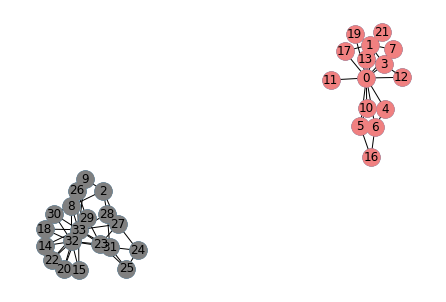

In [30]:
pos = nx.spring_layout(G) #layout for plotting graph
nx.draw(G,pos,with_labels=True)
#list of colors for differentiating each community with different colors
colors = ["lightcoral", "gray", "lightgray", "red", "chocolate", 
          "darkorange", "moccasin", "firebrick", "gold", "yellow", 
          "darkolivegreen", "chartreuse", "forestgreen", "lime", 
          "mediumaquamarine", "turquoise", "teal", "cadetblue", 
          "dogerblue", "blue", "slateblue", "blueviolet", "magenta", 
          "lightsteelblue"]
k = len(colors)
#print('k : ',k)
#for loop from 0 to l(number of communities in graph G) 
for i in range(0,l):
  n = i%k
  nx.draw_networkx_nodes(G,pos,nodelist=list(nx.connected_components(G))[i],node_color = colors[n])
#nx.draw_networkx_nodes(G,pos,nodelist=list(nx.connected_components(G))[1],node_color = 'g')
plt.show()

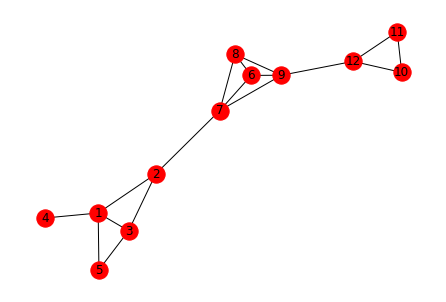

In [31]:
H = nx.Graph()
H.add_edges_from([[1,2],[2,3],[1,3],[1,4],[1,5],[3,5],[6,7],[7,8],[8,9],[6,9],[6,8],[7,9],[10,11],[11,12],[10,12],[9,12],[2,7]])
nx.draw(H, with_labels=True, node_color='r')

In [32]:
#calculating the edge betweenness centrality for each edge and sort them
#in the descending order so to remove edges with high edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(H).items()
sorted(edge_betweenness, key = lambda x : -x[1])
#print(edge_to_delete)

[((2, 7), 0.5303030303030303),
 ((9, 12), 0.4090909090909091),
 ((7, 9), 0.36363636363636365),
 ((1, 2), 0.30303030303030304),
 ((2, 3), 0.18181818181818182),
 ((1, 4), 0.16666666666666669),
 ((10, 12), 0.15151515151515152),
 ((11, 12), 0.15151515151515152),
 ((1, 5), 0.09090909090909091),
 ((6, 7), 0.09090909090909091),
 ((7, 8), 0.09090909090909091),
 ((3, 5), 0.07575757575757576),
 ((6, 9), 0.06060606060606061),
 ((8, 9), 0.06060606060606061),
 ((1, 3), 0.030303030303030304),
 ((6, 8), 0.015151515151515152),
 ((10, 11), 0.015151515151515152)]

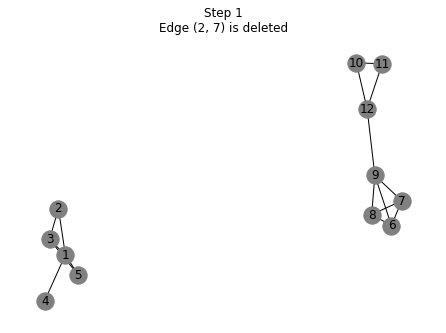

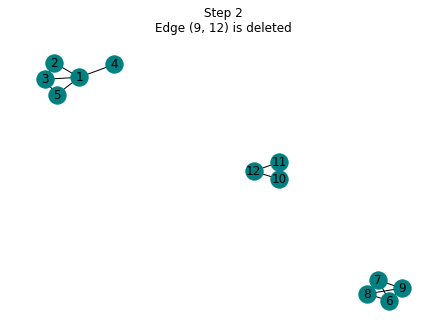

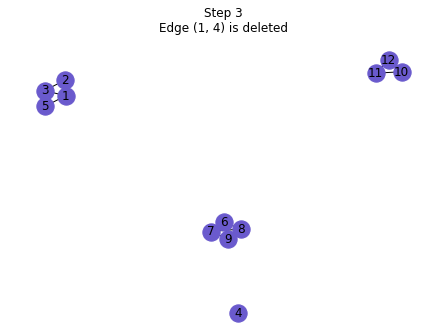

In [33]:
#here n is number of times graph should under go edge betweenness cenrtrality 
#i.e., how many communities in which the graph should be split among
#for each iteration it removes the edge with maximum edge betweenness cenrtrality
n = 3
colors = ["lightcoral", "gray", "lightgray", "firebrick", "red", 
          "chocolate", "darkorange", "moccasin", "gold", "yellow", 
          "darkolivegreen", "chartreuse", "forestgreen", "lime", 
          "mediumaquamarine", "turquoise", "teal", "cadetblue", 
          "dogerblue", "blue", "slateblue", "blueviolet", "magenta", 
          "lightsteelblue"]
k = len(colors)
for i in range(n):
  edge_betweenness = nx.edge_betweenness_centrality(H).items()
  edge_to_delete = sorted(edge_betweenness, key = lambda x : -x[1])[0][0]
  H.remove_edge(*edge_to_delete)
  m = random.randint(0,k)
  nx.draw(H, with_labels=True, node_color=colors[m])
  plt.title('Step %s\nEdge %s is deleted'%(i+1,edge_to_delete))
  plt.show()


In [34]:
component = list(nx.connected_components(H))
k = len(component)
print('Number of connected components : ',k)
component = list(nx.connected_components(H))

Number of connected components :  4


In [35]:
i = 0
for itm in component:
    print("Connected component",i,":",itm,"\n")
    d = c+str(i)
    d = dict(H.degree(itm))
    print("Length :",len(itm))
    p = list(dict(sorted(dict(H.degree(itm)).items(),key=lambda item:item[1])))[-1]
    print('Node ',p, ' has the highest degree with ',H.degree(p),' in connected component ',i)
    print(d,'\n')
    #print(G.degree(k))
    i+=1

Connected component 0 : {1, 2, 3, 5} 

Length : 4
Node  3  has the highest degree with  3  in connected component  0
{1: 3, 2: 2, 3: 3, 5: 2} 

Connected component 1 : {4} 

Length : 1
Node  4  has the highest degree with  0  in connected component  1
{4: 0} 

Connected component 2 : {8, 9, 6, 7} 

Length : 4
Node  7  has the highest degree with  3  in connected component  2
{8: 3, 9: 3, 6: 3, 7: 3} 

Connected component 3 : {10, 11, 12} 

Length : 3
Node  12  has the highest degree with  2  in connected component  3
{10: 2, 11: 2, 12: 2} 



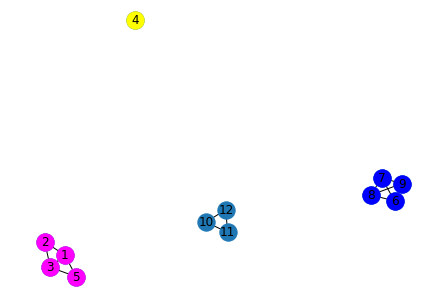

In [36]:
pos = nx.spring_layout(H)
nx.draw(H,pos,with_labels=True)
m = len(colors)
#print('k : ',k)
for i in range(0,l+1):
  #n = i%m
  n = random.randint(0, m)
  nx.draw_networkx_nodes(H,pos,nodelist=list(nx.connected_components(H))[i],node_color = colors[n])
#nx.draw_networkx_nodes(G,pos,nodelist=list(nx.connected_components(G))[1],node_color = 'g')
plt.show()